In [1]:
# %load code.py

import numpy as np
from profiles import *
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
from fitter import MinuitFitter
from utils import *

homedir = '/home/andrea/Desktop/work/DWARF/Jvalue/project1/test/Isotrop_Core_nonPlum'
MockSize = 100
dataSize = 100
dset = 1
# enter model choice - cf. casedir (options 1,2,3,4)
mod = 1
vstmc = 0
theta = 0.5
D = 100

data = load_gaia(homedir, MockSize, dataSize, dset, mod, D, True)

R = data[0]
v = data[1]
dv = data[2]
rh = data[-3]
r0_true = data[-2]
rho0_true = data[-1]

dm = build_profile('Zhao',a=1,b=3,c=0)
st = build_profile('plummer', **{'c':1, 'rh':rh})
kr = build_kernel('iso')

dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf, 'errs':False}
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)

LL = GaussianLikelihood([R, v, dv, vstmc], Sigma)
LL.set_free('dm_r0')
LL.set_free('dm_a')
LL.set_free('dm_b')
LL.set_free('dm_c')

global global_loglike
global_loglike = LL
M = MinuitFitter(LL)

# J
M.set_value('J',19)
M.set_error('J',0.01)
#M.set_bound('J',(18,22))
# r0
M.set_value('dm_r0',1.)
M.set_error('dm_r0',0.01)
M.set_bound('dm_r0',(R.min(),R.max()))
# a
M.set_value('dm_a',1.)
M.set_error('dm_a',0.01)
#M.set_bound('dm_a',(1e-10,10))
# b
M.set_value('dm_b',3.)
M.set_error('dm_b',0.01)
#M.set_bound('dm_b',(1e-10,10))
# c
M.set_value('dm_c',0.)
M.set_error('dm_c',0.01)
#M.set_bound('dm_c',(1e-10,10))

M.settings['print_level'] = 1

M.set_minuit(**{'tol':1e4,'strategy':2})
M.migrad_min()
J, L = M.minos_profile('J',**{'bound':(18,22),'subtract_min':True})

Using  /home/andrea/Desktop/work/DWARF/Jvalue/project1/test/Isotrop_Core_nonPlum/data/gs100_bs050_rcrs100_rarcinf_core_0400mpc3_df_100_1.dat


FCN = 352.784238497 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 0.0477185806778 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.005850e-01,1.754085e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,3.353757e+00,3.843176e+00,0.000000e+00,0.000000e+00,,,
3,J,1.922304e+01,2.145206e-01,0.000000e+00,0.000000e+00,,,
4,dm_c,5.440729e-02,3.345641e+00,0.000000e+00,0.000000e+00,,,
5,dm_r0,8.672578e-01,1.563677e+00,0.000000e+00,0.000000e+00,0.0753046857772,8.23682090666,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,7.005850e-01,1.722190e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,3.353757e+00,3.892701e+00,0.000000e+00,0.000000e+00,,,
3,J,1.922304e+01,2.153222e-01,0.000000e+00,0.000000e+00,,,
4,dm_c,5.440729e-02,3.294388e+00,0.000000e+00,0.000000e+00,,,
5,dm_r0,8.672578e-01,1.598939e+00,0.000000e+00,0.000000e+00,0.0753046857772,8.23682090666,


+,dm_a,dm_b,J,dm_c,dm_r0
dm_a,1.00,-0.68,-0.12,0.89,0.13
dm_b,-0.68,1.00,-0.21,-0.82,0.52
J,-0.12,-0.21,1.00,0.13,-0.32
dm_c,0.89,-0.82,0.13,1.00,0.04
dm_r0,0.13,0.52,-0.32,0.04,1.00


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg)
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg)
fitter.py:74: UserWarning: Migrad fails to converge for J=18.000000
  var_array, Like, res = self.minuit.mnprofile(var, **kwargs)
fitter.py:74: UserWarning: Migrad fails to converge for J=18.137931
  var_array, Like, res = self.minuit.mnprofile(var, **kwargs)
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.w

In [2]:
import pylab as plt
from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq
%matplotlib inline

In [3]:
J_array = np.asarray(J)
Like_array = np.asarray(L)
new_Like = interp(J_array,Like_array)

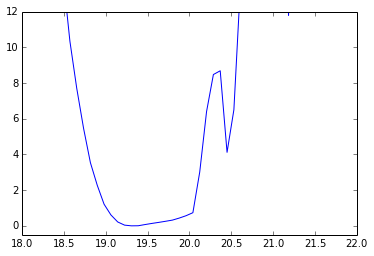

In [4]:
new_J = np.linspace(J_array.min(),J_array.max())
plt.plot(new_J, new_Like(new_J))
plt.ylim(-0.5,12);